In [3]:
%pylab inline
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
print(os.listdir("machine-learning"))

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib
['usps.h5']


In [4]:
import h5py 
from functools import reduce
def hdf5(path, data_key = "data", target_key = "target", flatten = True):
    """
        loads data from hdf5: 
        - hdf5 should have 'train' and 'test' groups 
        - each group should have 'data' and 'target' dataset or spcify the key
        - flatten means to flatten images N * (C * H * W) as N * D array
    """
    with h5py.File(path, 'r') as hf:
        train = hf.get('train')
        X_tr = train.get(data_key)[:]
        y_tr = train.get(target_key)[:]
        test = hf.get('test')
        X_te = test.get(data_key)[:]
        y_te = test.get(target_key)[:]
        if flatten:
            X_tr = X_tr.reshape(X_tr.shape[0], reduce(lambda a, b: a * b, X_tr.shape[1:]))
            X_te = X_te.reshape(X_te.shape[0], reduce(lambda a, b: a * b, X_te.shape[1:]))
    return X_tr, y_tr, X_te, y_te

In [253]:
X_tr, y_tr, X_te, y_te = hdf5("machine-learning/usps.h5")
X_tr.shape, X_te.shape
#I will choose how to split training and test
X_comb=np.append(X_tr,X_te,0)#9298 obs x 256 bits
y_comb=np.append(y_tr,y_te)
nRow= (len(X_comb[:,1]))
nCol= (len(X_comb[1,:]))
numbers = np.unique(y_comb)
print(f'There are {nRow} samples and {nCol} columns in total')
print(f'Numbers are {numbers} ')


There are 9298 samples and 256 columns in total
Numbers are [0 1 2 3 4 5 6 7 8 9] 


For label 0 get 2 random samples
For label 1 get 2 random samples
For label 2 get 2 random samples
For label 3 get 2 random samples
For label 4 get 2 random samples
For label 5 get 2 random samples
For label 6 get 2 random samples
For label 7 get 2 random samples
For label 8 get 2 random samples
For label 9 get 2 random samples
For label 9 no. indexes  644 
For label 9 index  388 will be at position 3685 in array X_comb 


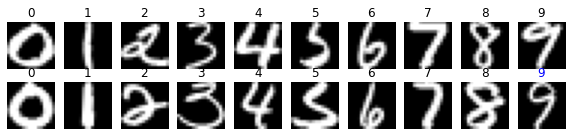

In [116]:
num_samples = 2 #rows to displya

classes = set(y_comb)
num_classes = len(classes)#10
fig, ax = plt.subplots(num_samples, num_classes, sharex = True, sharey = True, figsize=(num_classes, num_samples))

for label in range(num_classes):#for the number
    class_idxs = np.where(y_tr == label)#index of the label
    size_indexes_number_label= class_idxs[0].shape[0]
    print(f'For label {label} get {num_samples} random samples')
    for i, idx in enumerate(np.random.randint(0, size_indexes_number_label, num_samples)):#get num_samples i in labels
        ax[i, label].imshow(X_comb[class_idxs[0][idx]].reshape([16, 16]), 'gray')#px.imshow --reshape
        plt.title(label, fontsize=16,color='blue')
        ax[i, label].set_axis_off()
        ax[i, label].set_title(label)
print(f'For label {label} no. indexes  {size_indexes_number_label} ')
print(f'For label {label} index  {idx} will be at position {class_idxs[0][idx]} in array X_comb ')


In [20]:
nRow, nCol = X_tr.shape
numbers = np.unique(y_comb)

print(f'There are {nRow} rows and {nCol} columns in the training set')
print(f'Numbers are {numbers} ')



There are 7291 rows and 256 columns in the training set
Numbers are [0 1 2 3 4 5 6 7 8 9] 


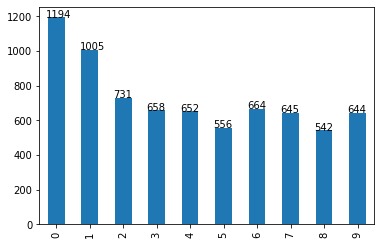

In [72]:
s1=pd.value_counts(y_tr).sort_index()
s1.plot.bar(align ='center') 
for v in s1.index:
    plt.text(v-0.3, (y_tr == v).sum(), str((y_tr == v).sum()));#move 0.3 to sx

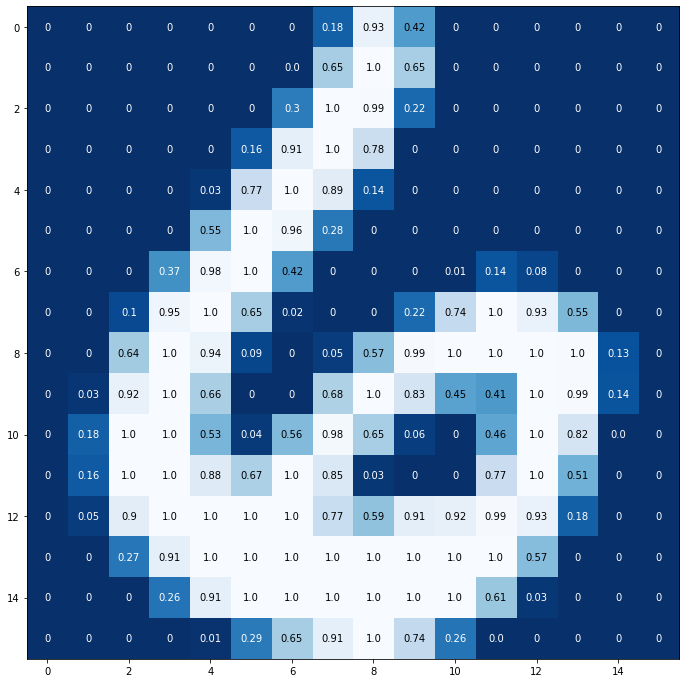

In [58]:
img = X_comb[0].reshape(16,16)

fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
ax.imshow(img, cmap='Blues_r')
width, height = img.shape
thresh = img.max()/2.5
for x in range(width):
    for y in range(height):
        val = round(img[x][y],2) if img[x][y] !=0 else 0
        ax.annotate(str(val), xy=(y,x),
                    horizontalalignment='center',
                    verticalalignment='center',
                    color='white' if img[x][y]<thresh else 'black')

In [168]:
print(y_comb.shape)

(9298,)


In [217]:
#one hot encode labels
import numpy as np

#We have 7291 numbers. For each number create 9 col.
y_combined = np.zeros((y_comb.shape[0], y_comb.max()+1), dtype=np.float32)#7291 rows,9cols
#ranges from 0->7290 ,0->9
y0, y1, y2, y3, y4, y5, y6, y7, y8, y9 = [],[],[],[],[],[],[],[],[],[]


for row in range(y_comb.shape[0]): #from 0 to 7291 
  for col in range(y_comb.max()+1):
    if(col == y_comb[row]):
      y_combined[row, col] = 1#col range from 0 to 9
      eval('y'+str(col)).append(int(1))
    else:
      y_combined[row, col] = -1
      eval('y'+str(col)).append(int(-1))

number=y_comb[3]
hot_encoded_number=y_combined[3,:]

print(f'Hot encoded numbers. E.g. number {number} becomes {hot_encoded_number}')

y0 = np.asarray(y0)
y1 = np.asarray(y1)
y2 = np.asarray(y2)
y3 = np.asarray(y3)
y4 = np.asarray(y4)
y5 = np.asarray(y5)
y6 = np.asarray(y6)
y7 = np.asarray(y7)
y8 = np.asarray(y8)
y9 = np.asarray(y9)


Hot encoded numbers. E.g. number 7 becomes [-1. -1. -1. -1. -1. -1. -1.  1. -1. -1.]


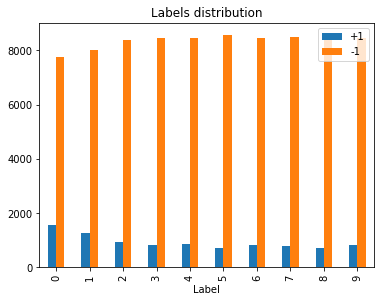

In [171]:
pos, neg = [], []
for i in numbers:
    index, count = np.unique(y_combined[:,i], return_counts=True)
    pos.append(np.int32(count[1]))
    neg.append(np.int32(count[0]))

df = pd.DataFrame(np.column_stack([numbers, pos, neg]), columns=['Label','+1','-1'])
fig = df.plot(x="Label", y=["+1", "-1"], kind="bar", title='Labels distribution', figsize=(6, 4.5)).get_figure()
fig.savefig("label_distribution.png")

In [259]:
df # Am dealing with unbalanced classes-->F1 as main metric
df = pd.DataFrame(np.column_stack([numbers, pos, neg]), columns=['Label','+1','-1'])
setsize=df["+1"]+df["-1"]
df.insert(1,"set size",setsize)
ratio=df["+1"]/df["-1"]
df.insert(4,"ratio +1 to -1",ratio)
print(df)





   Label  set size    +1    -1  ratio +1 to -1
0      0      9298  1553  7745        0.200516
1      1      9298  1269  8029        0.158052
2      2      9298   929  8369        0.111005
3      3      9298   824  8474        0.097239
4      4      9298   852  8446        0.100876
5      5      9298   716  8582        0.083430
6      6      9298   834  8464        0.098535
7      7      9298   792  8506        0.093111
8      8      9298   708  8590        0.082421
9      9      9298   821  8477        0.096850


In [42]:
df_X=pd.DataFrame(X_tr)
df_y=pd.DataFrame(y_tr)


In [77]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix', fontsize=15)
    plt.show()

In [62]:
df_X.describe()

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
count,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.00000,7291.000000,...,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000
mean,0.001791,0.009431,0.024424,0.056131,0.113266,0.194849,0.315504,0.477115,0.47368,0.357718,...,0.400727,0.569911,0.558219,0.342946,0.173145,0.081071,0.038903,0.021304,0.010355,0.002661
std,0.025856,0.075601,0.122132,0.180258,0.251330,0.314355,0.358016,0.384152,0.37649,0.373419,...,0.386447,0.376492,0.378668,0.362929,0.291277,0.207323,0.150415,0.114350,0.079499,0.033028
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000500,0.02500,0.000000,...,0.000000,0.169250,0.131000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.140500,0.530500,0.50100,0.219500,...,0.323500,0.684000,0.668000,0.210500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.019000,0.304500,0.627250,0.848000,0.83725,0.719000,...,0.777000,0.917500,0.907500,0.673000,0.247750,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.819000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.796000


In [65]:
max_pixel_value=df_X.max().max()
min_pixel_value=df_X.min().min()
print(f'Pixel numbers are between {min_pixel_value} and {max_pixel_value}')

#no null values
nullno=df_X.isnull().any().any()
print(f'Are there are any null numbers in the training set: {nullno}')


Pixel numbers are between 0.0 and 1.0
Are there are any null numbers in the training set: False


C:\Users\giuli\AppData\Local\Temp\ipykernel_2368\1327413760.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns') # drop columns with NaN


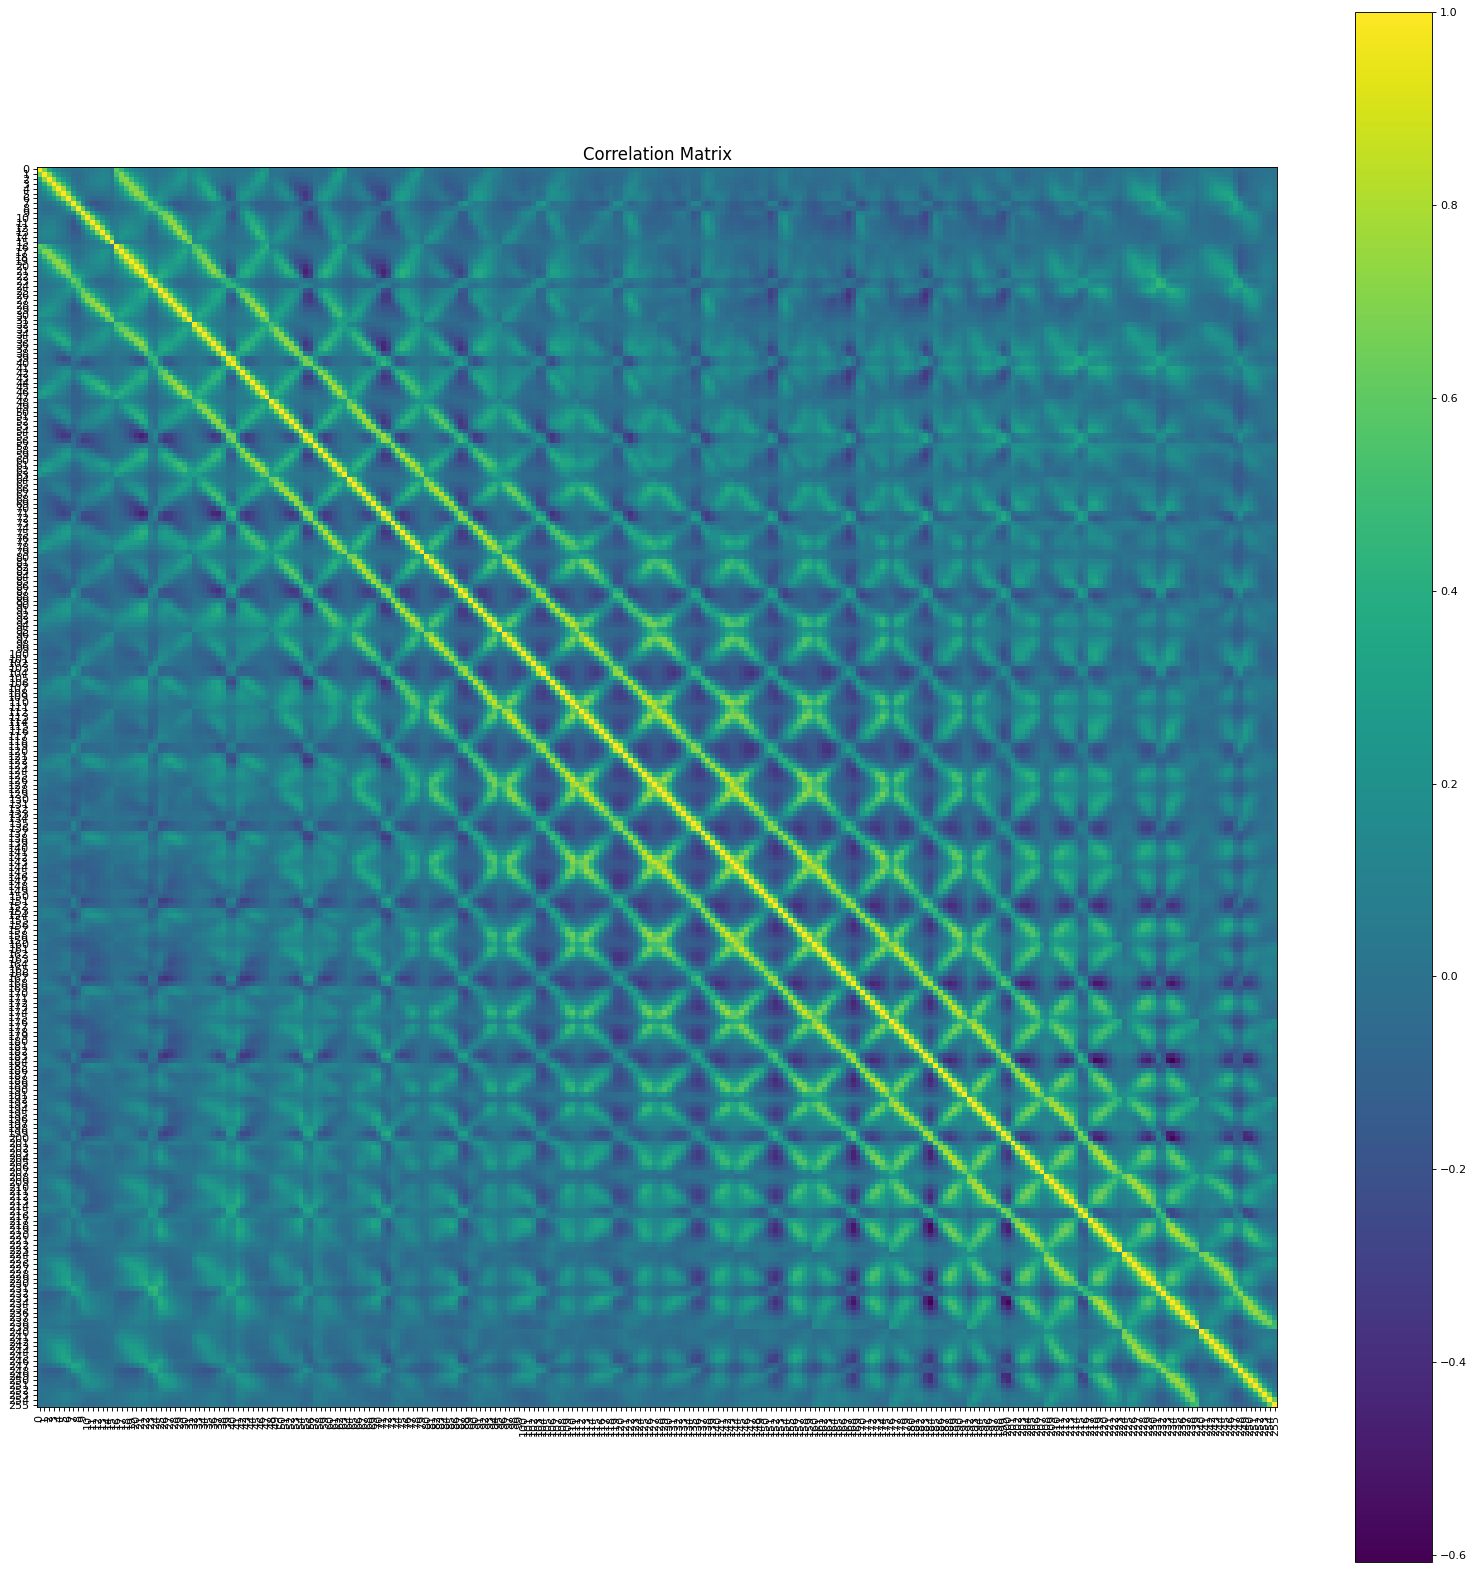

In [79]:
plotCorrelationMatrix(df_X, 25)
#Could do feature redn but then notice that (...)


In [69]:
df_X=pd.DataFrame(X_tr)
df_y=pd.DataFrame(y_tr)


In [81]:
from random import randint

class KernelPegasos():
    # kernels and loss function
    ## Kernelised Pegasos with different kernel support:- "linear","guassian", "polynomial"
    def __init__(self,T=10,lamb=1e-3,kernel="gaussian"):
        ##lamb --> regularisation param
        self.kernel_list=("gaussian")
        self.T=T
        self.pos_cl = 1
        self.neg_cl = -1
        self.lamb = lamb

        #kernel 
        if kernel not in self.kernel_list:
            raise Exception("Kernel not found!!\n")
        elif kernel == self.kernel_list[0]:
            self.kernel = self.gaussian_kernel
            
    #Define update functions
    def update_hinge(self,score,yi,xi,eta,w):
        if yi*score < 1:
            return (1 - eta*self.lamb)*w + eta*yi*xi
        else:
            return (1 - eta*self.lamb)*w

    def update_log(self,score,yi,xi,eta,w):
        return (1 - eta*self.lamb)*w + xi*eta*yi / (1+expit(yi*score))

    def linear_kernel(self,x,y):
        return np.dot(x,y)

    def polynomial_kernel(self,x, y, p=3):
        return (1 + np.dot(x, y)) ** p

    def gaussian_kernel(self,x, y, variance=0.25):
        #sigma**2 is variance
        mean=np.linalg.norm(x-y)**2
        return np.exp(-mean / (2 * variance))

            
    def fit(self,x,y):
        ## Complexity :- O(#epoch * #train samples)
        try:
            x=x.toarray()
        except AttributeError:
            pass
        x = np.insert(x,x.shape[1],1,axis=1)
        m,n = x.shape[0],x.shape[1] ## m --> number of samples , n --> number of features
        self.alpha = np.zeros((self.T+1,m))#iterations,samples
        y = list(y)
        classes = sorted(set(y))#encode firs 
        if len(classes) != 2:
            raise Exception("Not a binary classification!!\n")

        for t in range(self.T):
            step = 1. / (self.lamb*(t+1))
            #-- Choose a random xit , yit
            it = np.random.randint(0,m)#m is number of samples (lenght y)
            xit, yit = x[it], y[it]
            #---For all j different than it , set the next alpha[j] to the previous 1
            for j in range(m):
                if j!=it:
                    self.alpha[t+1,j]=self.alpha[t,j]
            #Perform the sum over j of the following 
            sum_=0.0
            for j in range(m):
                sum_+=self.alpha[t,j]*self.kernel(xit,x[j])*y[j]#alpha weights
            sum_*=yit*step
            if sum_<1:
                self.alpha[t+1,it] = self.alpha[t,it]+1
            else:
                self.alpha[t+1,it]=self.alpha[t,it]
        self.alpha = self.alpha[self.T]
        self.y_train = y
        self.x_train = x
        print("fitting Complete!!\n")
        return self

    def predict(self,xtest):
        ## complexity O(#support vectors * #test samples)
        try:
            xtest=xtest.toarray()
        except AttributeError:
            pass
        xtest = np.insert(xtest,xtest.shape[1],1,axis=1)
        l = xtest.shape[0]#size of ytest
        m = self.alpha.shape[0]#size of ytrain
        scores = np.zeros(l)
        for i in range(l):
            score=0.0
            for k in range(m):
                if self.alpha[k]>0:
                    score+=self.alpha[k]*self.kernel(xtest[i],self.x_train[k])*self.y_train[k]
            scores[i]=score
        ypred = np.select([scores>0.0, scores<=0.0], [self.pos_cl, self.neg_cl])
        return ypred

    def score(self,X,y_test):
        y_pred= self.predict(X)
        errors=0
        for i in range(size(y_pred)):
            if(y_pred[i]!=y_test[i]):
                errors+=1
        zerooneloss = errors/len(y_test)        
        accuracy =  1- zerooneloss#0-1 mean loss
        return accuracy
    

In [88]:
def metrics(y_pred,y_test):
    tp,tn,fp,fn=0,0,0,0
    for i in range(size(y_pred)):
        if(y_pred[i]==y_test[i]):
            if(y_test[i]==-1):#negative
                tn+=1
            else:
                tp+=1                
        elif(y_pred[i]!=y_test[i]):
            if(y_test[i]==-1):#negative
                fp+=1
            else:
                fn+=1
    if((tp+fp)==0):
        precision=0
    else:
        precision=tp/(tp+fp)
    if((tn+fn)==0):
        fnratio = 0
    else:
        fnratio=fn/(tn+fn)
    if((tp+fn)==0):
        recall=0
    else:
        recall=tp/(tp+fn)
    
    if(((2*tp+fp+fn))==0):
        f1score=0
    else:
        f1score=2*tp/(2*tp+fp+fn)
    if((tp+fp)+(tn+fn)==0):
        zerooneloss=0
    else:
        zerooneloss=(fp+fn)/(tp+fp+tn+fn)
    accuracy = 1-zerooneloss
    print("FN ratio: ", fnratio,"(",np.round(fnratio*100, 2),"%)")
    print("FP ratio: ", 1-precision,"(",np.round((1-precision)*100, 2),"%)")
    print("Precision: ", precision,"(",np.round(precision*100, 2),"%)")
    print("Recall: ", recall,"(",np.round(recall*100, 2),"%)")
    print("Accuracy: ", accuracy,"(",np.round(accuracy*100, 2),"%)")
    print("f1score: ", f1score,"(",np.round(f1score*100, 2),"%)")
    return precision,f1score

In [83]:
def non_shuffling_train_test_split(X, y, test_size=0.2):
    i = int((1 - test_size) * X.shape[0]) 
    X_train, X_test = np.split(X, [i])
    y_train, y_test = np.split(y, [i])
    return X_train, X_test, y_train, y_test

In [264]:
# Plot image (prediction and true_label)
def plot_image( i, prediction, true_label, img):
  img =  img[i].reshape((16,16))

  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  if prediction[i] == true_label[i]:
    color = 'blue'
  else:
    color = 'red'
  plt.xlabel("{} {:2.0f}% ({})".format(prediction[i],
                                100*np.max(prediction),
                                true_label[i]),
                                color=color, fontsize=18)

In [86]:
class Cross_Validation:
    @staticmethod
    def partition(X_train,y_train,k=5):
        Xrows = size(X_train[:,1])#6229
        Xcols = size(X_train[1,:])#256
        print('Xrows ' + str(Xrows) + " Xcols " + str(Xcols))
        print("Add y_train to X_train before shuffling")
        X_copy=np.zeros((Xrows,Xcols+1),dtype=np.float32)
        X_copy[:,256] = y_train
        X_copy[:,0:256] = X_train
        Xcols = size(X_copy[1,:])#256 cols
        Xrows = size(X_copy[:,1])#6229 samples rows
        print('Xrows ' + str(Xrows) + " Xcols " + str(Xcols))#6229x256 --> 6229x 257
    
        folds = np.array_split(X_copy, k)
        length=size(X_copy[1,:])-1
        return folds,length

In [318]:
#wout cv 
#for y=0
currentLabel=y0#this is label 0 -- have 
X_train, X_test, y_train, y_test = non_shuffling_train_test_split(X_comb,currentLabel,test_size=0.33)
nRow_tr = y_train.shape[0]
nRow_te= y_test.shape[0]
print(f'There are {nRow_tr} rows in the training set for number 0')
print(f'There are {nRow_te} rows  in the test set for number 0')



classifier = KernelPegasos()#default values -- 10 e-3
classifier.fit(X_train, y_train)
train_score=classifier.score(X_train,y_train)
train_precision,train_f1score= metrics(classifier.predict(X_train),y_train)

y_pred=classifier.predict(X_test)
test_acc_score=classifier.score(X_test,y_test)
test_precision,test_f1score= metrics(y_pred,y_test)

print('For number=' + str(0) + ' With T=' + str(10) + ' and lambda=' + str(1e-3) + 
' train acc score= ' +  str(train_score)+ ' train avg precision= ' + str(train_precision) + ' train avg f1score= ' + str(train_f1score)
+ ' test avg acc= ' + str(test_acc_score) + ' test avg precision= ' + str(test_precision) + ' test avg f1score= ' + str(test_f1score)
)



There are 6229 rows in the training set for number 0
There are 3069 rows  in the test set for number 0
fitting Complete!!

FN ratio:  0.10926282612502189 ( 10.93 %)
FP ratio:  0.2355212355212355 ( 23.55 %)
Precision:  0.7644787644787645 ( 76.45 %)
Recall:  0.38823529411764707 ( 38.82 %)
Accuracy:  0.8802375983303901 ( 88.02 %)
f1score:  0.5149544863459038 ( 51.5 %)
FN ratio:  0.11735061195104392 ( 11.74 %)
FP ratio:  0.28865979381443296 ( 28.87 %)
Precision:  0.711340206185567 ( 71.13 %)
Recall:  0.3883677298311445 ( 38.84 %)
Accuracy:  0.8664059954382535 ( 86.64 %)
f1score:  0.5024271844660194 ( 50.24 %)
For number=0 With T=10 and lambda=0.001 train acc score0.8802375983303901 train avg precision= 0.7644787644787645 train avg f1score 0.5149544863459038 test avg acc= 0.8664059954382535 test avg precision= 0.711340206185567 test avg f1score 0.5024271844660194


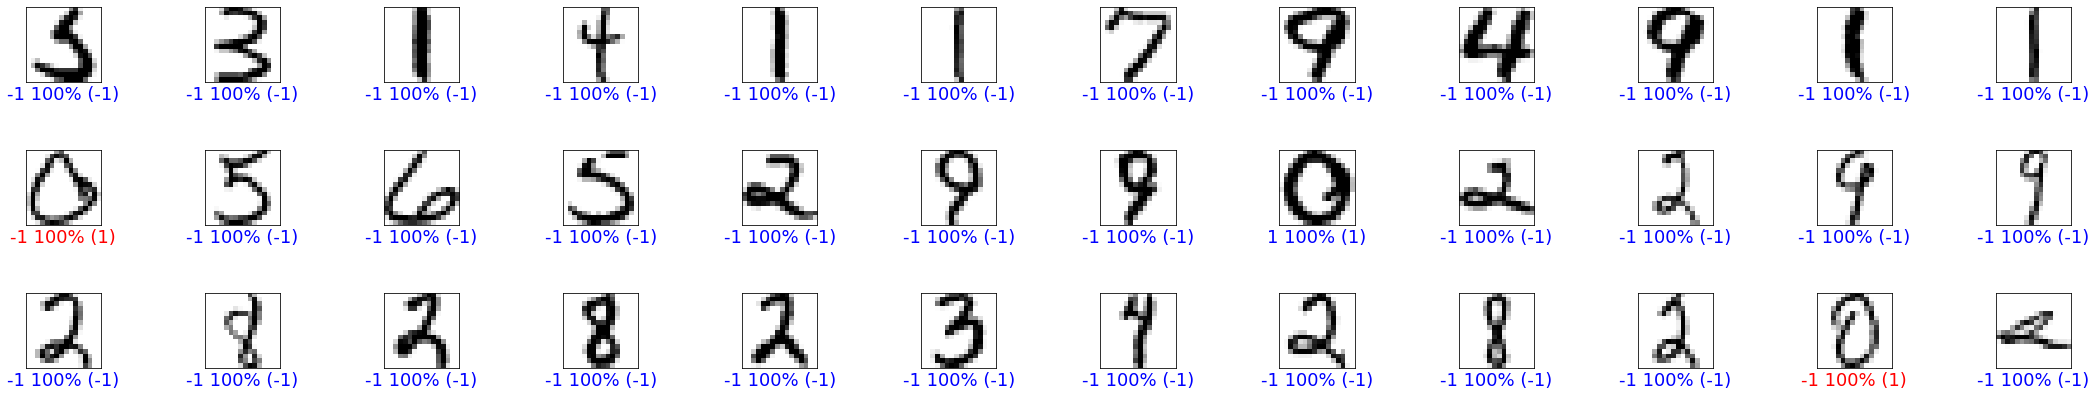

In [319]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 6
num_images = num_rows*num_cols
plt.figure(figsize=(5*num_cols, 2*num_rows))
for i in range(6*2*3):
    plt.subplot(num_rows, 2*2*num_cols, 2*i+1)
    plot_image(i,y_pred, y_test, X_test)
plt.tight_layout()
plt.show()


In [297]:
import warnings
warnings.filterwarnings('ignore')

In [299]:
#from sklearn.model_selection import train_test_split, KFold
ite=[10,100]
lmdb=[1e-5,1e-3]
cv=5
rows = size(ite)*size(lmdb)
acc_scores=np.zeros(cv)
prec_scores=np.zeros(cv)
f1_scores=np.zeros(cv)
results = np.zeros((rows , 5))
# 5 (2 hyper+acc+precision+f1)* number of ite

folds,length= Cross_Validation.partition(X_train,y_train,k=cv)

print('Performing 5-Fold validation')

col1no=-1
i=-1
for t in ite:
    col1no+=1
    col2no=-1
    for lm in lmdb:
        col2no+=1
        col3no=-1
        scores = np.zeros(5)   
        i+=1
        for kth in range (cv):
            xsubtest = folds[kth][:,:length] # Set ith fold to be test
            ysubtest = folds[kth][:,length]
            new_folds = np.row_stack(np.delete(folds,kth,0))
            xsubtrain = new_folds[:,:length]
            ysubtrain = new_folds[:,length]
            col3no += 1     
            svc = KernelPegasos(T=t, lamb=lm)
            svc.fit(xsubtrain, ysubtrain)
            acc_scores[col3no] = svc.score(xsubtest, ysubtest)#vector 5 
            prec,f1score= metrics(svc.predict(xsubtest), ysubtest)#vector 5 
            prec_scores[col3no] = prec#vector 5 
            f1_scores[col3no] = prec#vector 5 
            # get the mean -- get 1 value (cv estimate)
        acc_score= acc_scores.mean()
        prec_score= prec_scores.mean()
        f1_score= f1_scores.mean()
        print('For number 0 With T=' + str(t) + ' and lambda=' + str(lm) + ' CV_accuracy= ' + str(acc_score)
        + ' CV_precision= '+str(prec_score) + ' CV_f1_score= '+ str(f1_score))
        results[i] = [t, lm, acc_score, prec_score, f1_score] #3rd col put mean(scores)


Xrows 6229 Xcols 256
Add y_train to X_train before shuffling
Xrows 6229 Xcols 257
Performing 5-Fold validation
fitting Complete!!

FN ratio:  0.005747126436781609 ( 0.57 %)
FP ratio:  0.34042553191489366 ( 34.04 %)
Precision:  0.6595744680851063 ( 65.96 %)
Recall:  0.9802371541501976 ( 98.02 %)
Accuracy:  0.8932584269662921 ( 89.33 %)
f1score:  0.7885532591414944 ( 78.86 %)
fitting Complete!!

FN ratio:  0.0914179104477612 ( 9.14 %)
FP ratio:  0.22988505747126442 ( 22.99 %)
Precision:  0.7701149425287356 ( 77.01 %)
Recall:  0.5775862068965517 ( 57.76 %)
Accuracy:  0.8892455858747994 ( 88.92 %)
f1score:  0.6600985221674877 ( 66.01 %)
fitting Complete!!

FN ratio:  0.07869974337040206 ( 7.87 %)
FP ratio:  0.18181818181818177 ( 18.18 %)
Precision:  0.8181818181818182 ( 81.82 %)
Recall:  0.4064516129032258 ( 40.65 %)
Accuracy:  0.9149277688603531 ( 91.49 %)
f1score:  0.5431034482758621 ( 54.31 %)
fitting Complete!!

FN ratio:  0.07914572864321608 ( 7.91 %)
FP ratio:  0.6822222222222223 ( 6

In [313]:
import numpy as np 
from pandas import DataFrame
import seaborn as sns
%matplotlib inline

df = DataFrame(results, columns=["ite", "lambda", "accuracy", "precision", "f1score"])
df


,ite,lambda,accuracy,precision,f1score
0,10.0,0.00001,0.852145,0.513130,0.513130
1,10.0,0.00100,0.858894,0.494576,0.494576
2,100.0,0.00001,0.964040,0.852946,0.852946
3,100.0,0.00100,0.962915,0.837430,0.837430


Text(0.5, 1.0, 'number 0')

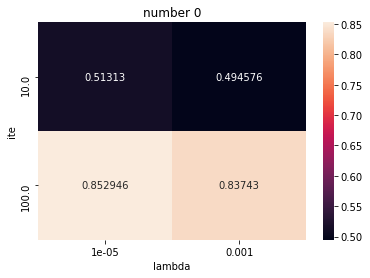

In [328]:
check=df["f1score"]
import matplotlib.pyplot as plt
import pandas as pd

pivoted_table = df.pivot(index='ite', columns='lambda', values='f1score')
pivoted_table.fillna(0, inplace=True)

sns.heatmap(pivoted_table,annot=True, fmt='g')
plt.title("number 0")

In [323]:
index_f1= np.argmax(df["f1score"])#then get parametrs related to 
index_acc= np.argmax(df["accuracy"])#then get parametrs related to 
print('Row ' + str(index_acc)+ ' has the best accuracy')
print('Row ' + str(index_f1)+ ' has the best f1score')
print("--Extracting row --")
best_values= df.take([index_f1])
print(best_values)
arr_best_values = results[index_f1]

Row 2 has the best accuracy
Row 2 has the best f1score
--Extracting row --
     ite   lambda  accuracy  precision   f1score
2  100.0  0.00001   0.96404   0.852946  0.852946


In [324]:
svc = KernelPegasos(T=100, lamb=1e-5)
svc.fit(X_train,y_train)#fit on the whole training
print("On test set")
y_pred=svc.predict(X_test)
precision,f1_score = metrics(y_pred,y_test)#this is independent 
accuracy =svc.score(X_test,y_test)
print('With hyperparameters T=100 and lamb=1e-5 we get a test score of ' #
'accuracy ' + str(accuracy) + ' precision '  +str(precision) + ' f1 score ' +str(f1_score))


fitting Complete!!

FN ratio:  0.011029411764705883 ( 1.1 %)
FP ratio:  0.18518518518518523 ( 18.52 %)
Precision:  0.8148148148148148 ( 81.48 %)
Recall:  0.949343339587242 ( 94.93 %)
Accuracy:  0.9537308569566634 ( 95.37 %)
f1score:  0.8769497400346621 ( 87.69 %)
With hyperparameters T=100 and lamb=1e-5 we get a test score of accuracy 0.9537308569566634 precision 0.8148148148148148 f1 score 0.8769497400346621


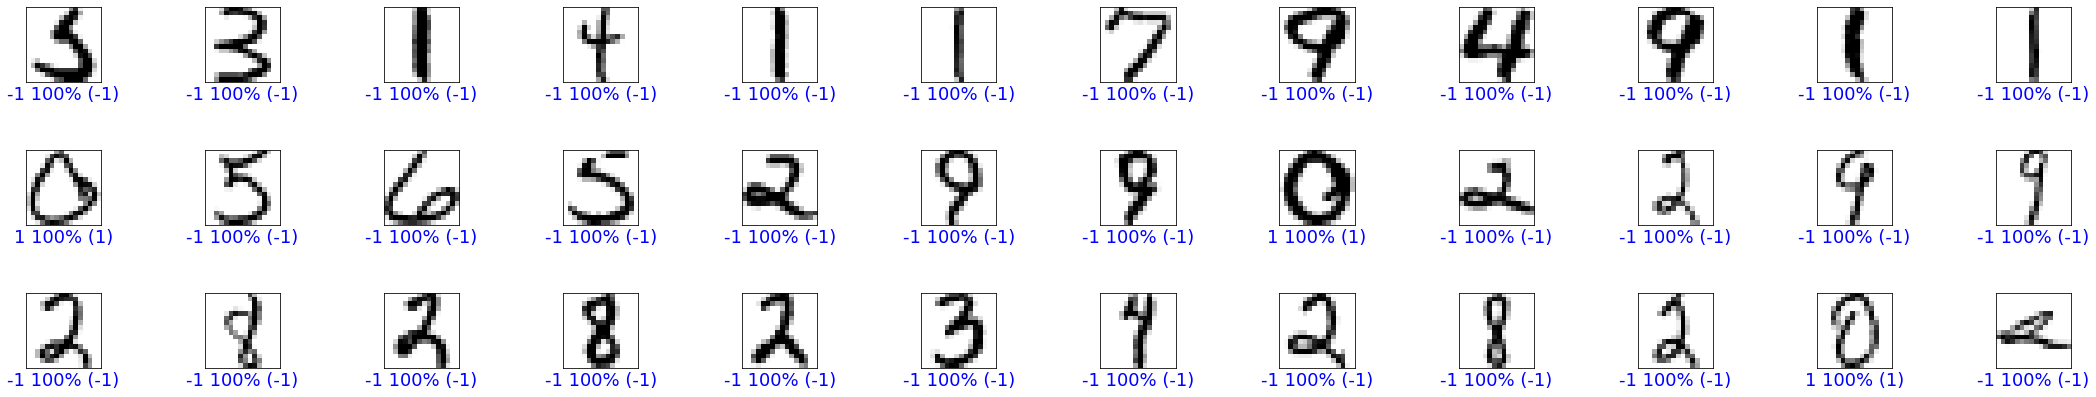

In [325]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 6
num_images = num_rows*num_cols
plt.figure(figsize=(5*num_cols, 2*num_rows))#30,10
for i in range(6*2*3):
    plt.subplot(num_rows, 2*2*num_cols, 2*i+1)#5,12,
    plot_image(i,y_pred, y_test, X_test)#un numero
plt.tight_layout()
plt.show()


In [333]:
print('for training data ')
precision,f1score=metrics(svc.predict(X_train),y_train)

for training data 
FN ratio:  0.008272601930273784 ( 0.83 %)
FP ratio:  0.15104166666666663 ( 15.1 %)
Precision:  0.8489583333333334 ( 84.9 %)
Recall:  0.9588235294117647 ( 95.88 %)
Accuracy:  0.9653234869160379 ( 96.53 %)
f1score:  0.9005524861878453 ( 90.06 %)


In [335]:
#Do it on loop 0->9
#90 rows -- around 4h30
lim_num_classes=num_classes

import time
cv=5
count=-1
# Choose hyperparams
ite = [10,100,1000]
lmdb=[1e-7,1e-5,1]
rows = size(ite)*size(lmdb)*lim_num_classes
results = np.zeros((rows , 2+3+1+1)) # 7 (2 hyper+acc+prec+f1+time+testlabel)* number of ite
precision_scores = np.zeros(cv)
f1_scores = np.zeros(cv)
acc_scores=np.zeros(cv)

for j in range (0,lim_num_classes):
    currentLabel=eval('y'+str(j)) #this is label i -- have 
    print("--" + 'y' + str(j) +"--" )
    #Split in train test
    X_train, X_test, y_train, y_test = non_shuffling_train_test_split(X_comb,currentLabel,test_size=0.33)

    folds,length= Cross_Validation.partition(X_train,y_train,k=cv)

    print('Performing ' + str(cv) + '-Fold validation')
    col1no=-1

    for t in ite:
        col1no+=1
        col2no=-1
        for lm in lmdb:
                col2no+=1
                col3no=-1
                scores = np.zeros(cv)   #5 times cross val
                count+=1
                elaspedt=0
                for kth in range (cv):
                    xsubtest = folds[kth][:,:length] # Set ith fold to be test
                    ysubtest = folds[kth][:,length]
                    new_folds = np.row_stack(np.delete(folds,kth,0))
                    xsubtrain = new_folds[:,:length]
                    ysubtrain = new_folds[:,length]
                    col3no += 1
                    svc = KernelPegasos(T=t, lamb=lm)
                    start = time.time()     
                    svc.fit(xsubtrain, ysubtrain)
                    acc_scores[col3no] = svc.score(xsubtest, ysubtest)#vector 5 
                    end = time.time()
                    precision,f1score=metrics(svc.predict(xsubtest),ysubtest)#precision f1score
                    precision_scores[col3no] = precision
                    f1_scores[col3no] = f1score
                    elaspedt+=(end-start)
                # get the mean -- get 1 value (cv estimate)
                mean_acc = acc_scores.mean()#will get nxm mean scores --> get
                mean_precision=precision_scores.mean()
                mean_f1= f1_scores.mean()

                results[count] = [j, t, lm, mean_acc,mean_precision,mean_f1, elaspedt] #3rd col put mean(scores)
                print('Print row ' + str(count) + ' For number = ' + str(j) + ' with T=' + str(t) 
                +' and lambda=' + str(lm) + ' avg_acc=' + str(mean_acc)+ ' av_precision=' + str(mean_precision)
                +' avg_f1_score=' + str(mean_f1)+ ' time ' +str(elaspedt))

--y0--
Xrows 6229 Xcols 256
Add y_train to X_train before shuffling
Xrows 6229 Xcols 257
Performing 5-Fold validation
fitting Complete!!

FN ratio:  0.003778337531486146 ( 0.38 %)
FP ratio:  0.44690265486725667 ( 44.69 %)
Precision:  0.5530973451327433 ( 55.31 %)
Recall:  0.9881422924901185 ( 98.81 %)
Accuracy:  0.8354735152487962 ( 83.55 %)
f1score:  0.7092198581560284 ( 70.92 %)
fitting Complete!!

FN ratio:  0.049707602339181284 ( 4.97 %)
FP ratio:  0.17727272727272725 ( 17.73 %)
Precision:  0.8227272727272728 ( 82.27 %)
Recall:  0.7801724137931034 ( 78.02 %)
Accuracy:  0.92776886035313 ( 92.78 %)
f1score:  0.8008849557522124 ( 80.09 %)
fitting Complete!!

FN ratio:  0.016842105263157894 ( 1.68 %)
FP ratio:  0.5304054054054055 ( 53.04 %)
Precision:  0.46959459459459457 ( 46.96 %)
Recall:  0.896774193548387 ( 89.68 %)
Accuracy:  0.8611556982343499 ( 86.12 %)
f1score:  0.6164079822616408 ( 61.64 %)
fitting Complete!!

FN ratio:  0.016611295681063124 ( 1.66 %)
FP ratio:  0.443148688046

In [336]:
best_params = np.zeros((10,7))

df = pd.DataFrame(results, columns=["number", "ite", "lambda", "acc_score","prec_score", "f1_score", "time"])
df['number'] = df['number'].astype('int')
# for given rows check 
for i in range(0,10):
    check = df[df["number"] == i]
    index = np.argmax(check["f1_score"])
    best_values= check.take([index])
    best_params[i] = best_values

df_best_params = pd.DataFrame(best_params, columns=["number", "ite", "lambda", "acc_score", "prec_score", "f1_score" , "time",])
print(df_best_params)

   number     ite        lambda  acc_score  prec_score  f1_score        time
0     0.0  1000.0  1.000000e-07   0.988442    0.942471  0.963721  349.629387
1     1.0  1000.0  1.000000e-05   0.994541    0.959988  0.979535  331.701019
2     2.0  1000.0  1.000000e-07   0.983143    0.961285  0.911006  325.960459
3     3.0  1000.0  1.000000e-05   0.984267    0.895173  0.910056  329.047890
4     4.0  1000.0  1.000000e-07   0.981538    0.925201  0.891963  326.220294
5     5.0  1000.0  1.000000e-07   0.983785    0.910501  0.886378  324.111522
6     6.0  1000.0  1.000000e-05   0.991170    0.951165  0.951543  317.334673
7     7.0  1000.0  1.000000e+00   0.987157    0.899438  0.926890  331.552081
8     8.0  1000.0  1.000000e-07   0.983625    0.909986  0.877102  331.878395
9     9.0  1000.0  1.000000e-07   0.978969    0.857410  0.883206  314.677369


In [337]:
df_best_params.groupby(['ite', 'lambda']).size()


ite     lambda      
1000.0  1.000000e-07    6
        1.000000e-05    3
        1.000000e+00    1
dtype: int64

In [339]:
# With the best T and lambda evaluatemodel ontest set (k-fold)
#Fit on whole data to get an estimate of the performance of the model (CV test)
acc_scores = np.zeros(5)
prec_scores = np.zeros(5)
f1_scores = np.zeros(5)
fin_results= np.zeros((10,4))
#chosen T
best_T=1000
best_lamb=1e-7
print('Evaluating test set')
print('Chose T= ' + str(best_T) + ' lambda= ' + str(best_lamb) )
for j in range (0,10):
    telaps=0
    currentLabel=eval('y'+str(j)) #this is label i -- have 
    print('---------y' + str(j) + '------------')
    svc = KernelPegasos(T=best_T, lamb=best_lamb)
    col3no=-1
    folds, length = Cross_Validation.partition(X_comb,currentLabel)
    for kth in range (cv):
        xsubtest = folds[kth][:,:length] # Set ith fold to be test
        ysubtest = folds[kth][:,length]
        new_folds = np.row_stack(np.delete(folds,kth,0))
        xsubtrain = new_folds[:,:length]
        ysubtrain = new_folds[:,length]
        col3no += 1       
        start=time.time()     
        svc.fit(xsubtrain,ysubtrain)
        acc_scores[col3no] = svc.score(xsubtest, ysubtest)#vector 5 
        end=time.time()
        precision,f1score=metrics(svc.predict(xsubtest),ysubtest)#precision f1score
        prec_scores[col3no] = precision
        f1_scores[col3no] = f1score
        telaps+=end-start
    # get the mean -- get 1 value (cv estimate)
    mean_acc_score= sum(acc_scores)/len(acc_scores)
    mean_prec_scores= prec_scores.mean()
    mean_f1_scores= f1_scores.mean()

    print('For number ' +str(j) + ' acc CV score=' + str(mean_acc_score)+ ' prec CV score=' + str(mean_prec_scores) 
        + ' f1score CV score=' + str(mean_f1_scores)+ ' time ' +str(telaps))
    fin_results[j]=[mean_acc_score,mean_prec_scores,mean_f1_scores,telaps]
#@55mins

Evaluating test set
Chose T= 1000 lambda= 1e-07
---------y0------------
Xrows 9298 Xcols 256
Add y_train to X_train before shuffling
Xrows 9298 Xcols 257
fitting Complete!!

FN ratio:  0.001349527665317139 ( 0.13 %)
FP ratio:  0.042328042328042326 ( 4.23 %)
Precision:  0.9576719576719577 ( 95.77 %)
Recall:  0.9945054945054945 ( 99.45 %)
Accuracy:  0.9903225806451613 ( 99.03 %)
f1score:  0.9757412398921833 ( 97.57 %)
fitting Complete!!

FN ratio:  0.004438807863031071 ( 0.44 %)
FP ratio:  0.06713780918727918 ( 6.71 %)
Precision:  0.9328621908127208 ( 93.29 %)
Recall:  0.974169741697417 ( 97.42 %)
Accuracy:  0.986021505376344 ( 98.6 %)
f1score:  0.9530685920577617 ( 95.31 %)
fitting Complete!!

FN ratio:  0.0044728434504792336 ( 0.45 %)
FP ratio:  0.05084745762711862 ( 5.08 %)
Precision:  0.9491525423728814 ( 94.92 %)
Recall:  0.975609756097561 ( 97.56 %)
Accuracy:  0.9881720430107527 ( 98.82 %)
f1score:  0.9621993127147767 ( 96.22 %)
fitting Complete!!

FN ratio:  0.0032552083333333335 

In [340]:
df_final_model= pd.DataFrame(fin_results, columns=["CV acc score", "CV prec score", "CV f1score", "CV time"])
print(df_final_model)


   CV acc score  CV prec score  CV f1score     CV time
0      0.986018       0.936082    0.958665  529.410938
1      0.993224       0.961213    0.975087  490.283355
2      0.983114       0.945944    0.909352  492.642788
3      0.981608       0.873038    0.894428  494.441230
4      0.976770       0.926400    0.867735  479.457495
5      0.980747       0.901768    0.873418  697.706847
6      0.991073       0.952068    0.949902  761.087701
7      0.985051       0.893579    0.913877  797.223871
8      0.983329       0.936044    0.884905  608.178903
9      0.977737       0.839002    0.873075  486.943862


In [345]:
index = np.argmin(df_final_model["CV f1score"])
print("Worst value is for number = "+ str(index))
worst_value= df_final_model.take([index])
print(worst_value)


Worst value is for number = 4
   CV acc score  CV prec score  CV f1score     CV time
4       0.97677         0.9264    0.867735  479.457495


In [348]:
#-- Interlude -- Want to get some pictures regarding number 4 
#Fit on whole data to get an estimate of the performance of the model (CV test)

best_T=1000
best_lamb=1e-7
print('Evaluating test set')
print('Chose T= ' + str(best_T) + ' lambda= ' + str(best_lamb) )
#for j in range (0,lim_num_classes):
j=4
currentLabel=eval('y'+str(j)) #this is label i -- have 
svc = KernelPegasos(T=best_T, lamb=best_lamb)
folds, length = Cross_Validation.partition(X_comb,currentLabel)
kth=4#for 5th fold--> .81
print('For number '+ str(j) + ' getting '+str(kth) + " fold look for y_pred")
xsubtest = folds[kth][:,:length] # Set ith fold to be test
ysubtest = folds[kth][:,length]
new_folds = np.row_stack(np.delete(folds,kth,0))
xsubtrain = new_folds[:,:length]
ysubtrain = new_folds[:,length]    
svc.fit(xsubtrain,ysubtrain)
y_pred=svc.predict(xsubtest)

Evaluating test set
Chose T= 1000 lambda= 1e-07
Xrows 9298 Xcols 256
Add y_train to X_train before shuffling
Xrows 9298 Xcols 257
For number 4 getting 4 fold look for y_pred
fitting Complete!!



In [356]:
metrics(y_pred,ysubtest)

FN ratio:  0.020771513353115726 ( 2.08 %)
FP ratio:  0.09195402298850575 ( 9.2 %)
Precision:  0.9080459770114943 ( 90.8 %)
Recall:  0.8186528497409327 ( 81.87 %)
Accuracy:  0.9725658956428187 ( 97.26 %)
f1score:  0.8610354223433242 ( 86.1 %)


(0.9080459770114943, 0.8610354223433242)

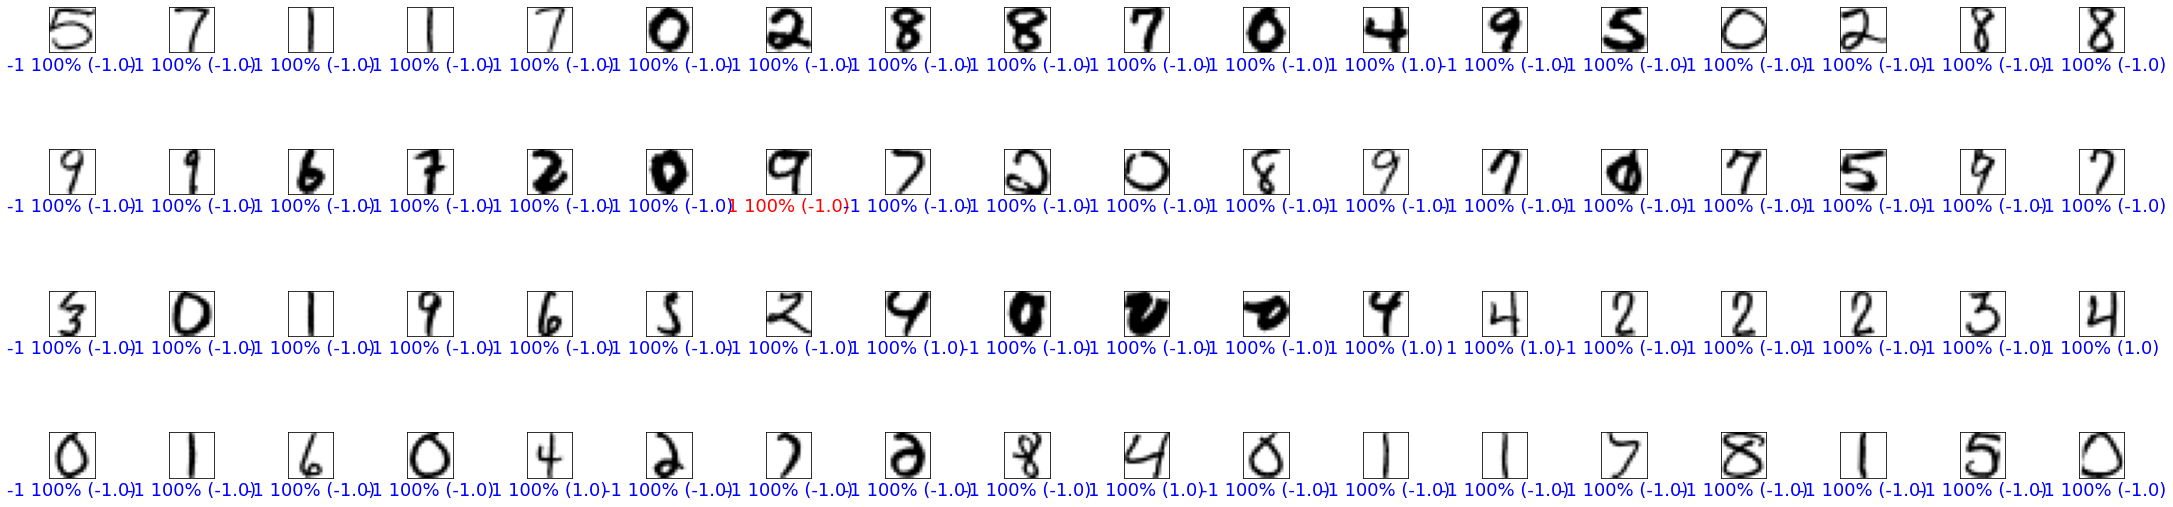

In [372]:
#get some number 4's
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
# precision (if i say its 4--> will be 4) recall (false positive)
num_rows = 5
num_cols = 6
num_images = num_rows*num_cols
plt.figure(figsize=(5*num_cols, 2*num_rows))#30,10
for i in range(12*3*2):
    plt.subplot(num_rows, 6*num_cols, 2*i+1)#5,12,
    plot_image(i+300,y_pred, ysubtest, xsubtest)#un numero
plt.tight_layout()
plt.show()


In [341]:
#Get average CV scores of model on the dataset
df_final_model.mean()

CV acc score       0.983867
CV prec score      0.916514
CV f1score         0.910044
CV time          583.737699
dtype: float64

In [ ]:
################################################
########### END ################################
###############################################

In [ ]:
##to add 
#save wrong ones

count=0

for i in range(len(y_pred)):
    if(y_pred[i]!=y_test[i]):
        count+=1
y_pred_inc=np.zeros(count)
y_test_inc=np.zeros(count)
x_test_inc=np.zeros(count,257)


for i in range(len(y_pred)):
    if(y_pred[i]!=y_test[i]):
        y_pred_inc[i]=y_pred[i]
        y_test_inc[i]=y_test[i]
        x_test_inc[i]=xsubtest[i]

In [ ]:
#get some number 4's
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
# precision (if i say its 4--> will be 4) recall (false positive)
num_rows = 5
num_cols = 6
num_images = num_rows*num_cols
plt.figure(figsize=(5*num_cols, 2*num_rows))#30,10
for i in range(12*3*2):
    plt.subplot(num_rows, 6*num_cols, 2*i+1)#5,12,
    plot_image(i+300,y_pred_inc, y_test_inc, x_test_inc)#un numero
plt.tight_layout()
plt.show()


In [ ]:
################################################
########### END of END################################
###############################################